In [1]:
from hawk_backtester import run_backtest
from tests.test_basic import convert_py_dataframe_to_backtester_format
from tests.test_basic import initialize_example_data
import polars as pl
import plotly.express as px


In [2]:
prices, weights = initialize_example_data()

pivoted_data = convert_py_dataframe_to_backtester_format(prices)




result = run_backtest(pivoted_data, weights, 0.0)
print(result)

shape: (109, 3)
┌────────────┬───────────┬────────────────────┐
│ date       ┆ returns   ┆ cumulative_returns │
│ ---        ┆ ---       ┆ ---                │
│ i64        ┆ f64       ┆ f64                │
╞════════════╪═══════════╪════════════════════╡
│ 1270166400 ┆ 0.000393  ┆ 0.000393           │
│ 1270425600 ┆ -0.000197 ┆ 0.000196           │
│ 1270512000 ┆ 0.000686  ┆ 0.000882           │
│ 1270598400 ┆ -0.001493 ┆ -0.000611          │
│ 1270684800 ┆ -0.00293  ┆ -0.003541          │
│ …          ┆ …         ┆ …                  │
│ 1282780800 ┆ 0.000588  ┆ 0.048772           │
│ 1282867200 ┆ -0.003478 ┆ 0.045295           │
│ 1283126400 ┆ 0.001921  ┆ 0.047216           │
│ 1283212800 ┆ 0.004758  ┆ 0.051974           │
│ 1283299200 ┆ 0.002334  ┆ 0.054308           │
└────────────┴───────────┴────────────────────┘


In [5]:
# plot column 'Cumulative Returns'
result.plot(y="cumulative_returns", title="Cumulative Returns")


:Curve   [index]   (cumulative_returns)

In [3]:
## Sum the returns  cumulatively versus the timestamp
cumulative_returns = result.select(pl.col("returns").cumsum())
print(cumulative_returns)

## Plot the cumulative returns
cumulative_returns.plot(y="returns", title="Cumulative Returns")

## Plot the distribution of the returns
result.plot(y="returns", kind="histogram", bins=100, title="Returns Distribution")

/tmp/ipykernel_228440/2550628811.py:2: DeprecationWarning: `cumsum` is deprecated. It has been renamed to `cum_sum`.
  cumulative_returns = result.select(pl.col("returns").cumsum())


shape: (109, 1)
┌───────────┐
│ returns   │
│ ---       │
│ f64       │
╞═══════════╡
│ 0.000393  │
│ 0.000196  │
│ 0.000882  │
│ -0.000611 │
│ -0.003541 │
│ …         │
│ 0.048772  │
│ 0.045295  │
│ 0.047216  │
│ 0.051974  │
│ 0.054308  │
└───────────┘


NotImplementedError: kind='histogram' for data of type <class 'polars.dataframe.frame.DataFrame'>

In [4]:
import plotly.express as px

# For cumulative returns
result.with_columns(pl.col("returns").cum_sum().alias("cumulative_returns"))\
    .plot(x="date", y="cumulative_returns", title="Cumulative Returns")

# For histogram
fig = px.histogram(result, x="returns", nbins=100, title="Returns Distribution")
fig.show()



ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

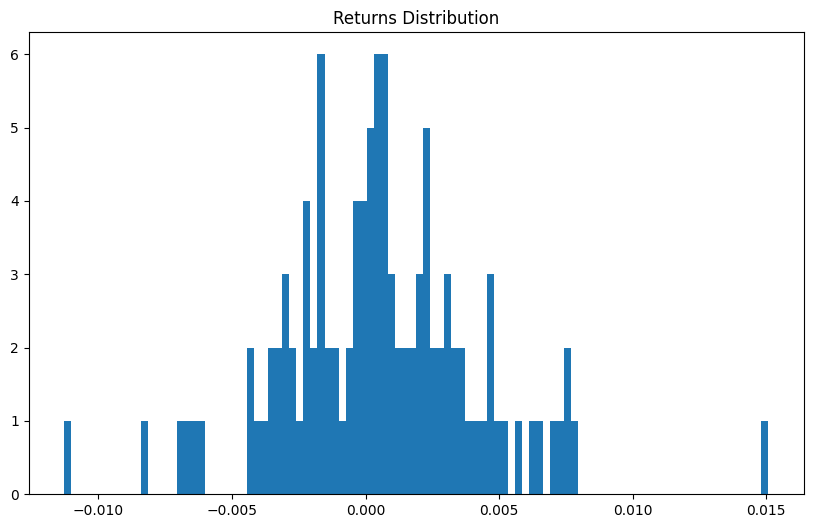

In [18]:
import matplotlib.pyplot as plt

# For histogram
plt.figure(figsize=(10, 6))
plt.hist(result["returns"], bins=100)
plt.title("Returns Distribution")
plt.show()